In [1]:
import pandas as pd
import os
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../preds/ensemble.inference.simple.lr.csv")
df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,OTHER
0,100_20130204_110843_l_カラー眼底,0.980379,0.015615,0.003196,0.016326,0.059827,0.001320,0.001766,0.002102,0.001262,...,0.001035,0.000970,0.000733,0.001211,0.001305,0.000794,0.001708,0.000762,0.001234,0.001459
1,100_20130204_110843_r_カラー眼底,0.993321,0.022224,0.001874,0.158464,0.010169,0.002146,0.001919,0.004894,0.000865,...,0.000943,0.000647,0.000934,0.001023,0.001273,0.000935,0.000984,0.000662,0.002674,0.001176
2,101_20050905_134530_l_カラー眼底,0.997455,0.013383,0.001849,0.019414,0.009096,0.001524,0.002063,0.001703,0.001181,...,0.001190,0.000955,0.000854,0.001476,0.002015,0.001016,0.001252,0.000686,0.001353,0.001324
3,101_20050905_134530_r_カラー眼底,0.997750,0.015637,0.001790,0.014480,0.007675,0.001504,0.001903,0.001721,0.001318,...,0.001238,0.000920,0.000941,0.001433,0.005954,0.001025,0.001197,0.000657,0.001389,0.001291
4,101_20120702_130425_l_カラー眼底,0.998002,0.011136,0.001665,0.020190,0.008988,0.001529,0.001622,0.002048,0.000951,...,0.000902,0.000992,0.000632,0.001330,0.002896,0.000965,0.001252,0.000714,0.001075,0.001141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,c96_20181213_100220_l_カラー眼底,0.161037,0.012797,0.002670,0.011096,0.016238,0.001355,0.001391,0.402785,0.001069,...,0.001118,0.000757,0.000652,0.000853,0.000895,0.000666,0.001162,0.000699,0.000692,0.002651
684,c97_20160516_113710_r_カラー眼底,0.052077,0.004583,0.001585,0.007413,0.140579,0.000903,0.001186,0.002140,0.001010,...,0.000784,0.001206,0.000497,0.000992,0.001094,0.000538,0.001658,0.000794,0.000721,0.001733
685,c98_20160516_113710_l_カラー眼底,0.131403,0.011923,0.001426,0.007566,0.008840,0.001113,0.001218,0.002602,0.000873,...,0.000823,0.000861,0.000534,0.001102,0.001562,0.000664,0.001255,0.000711,0.000746,0.001504
686,c99_20210623_124732_r_カラー眼底,0.999862,0.014345,0.011134,0.006907,0.009544,0.001468,0.001291,0.008603,0.000442,...,0.000467,0.001094,0.000317,0.000907,0.001318,0.000872,0.001260,0.001110,0.000454,0.000713


In [3]:
df_processed = df.filter(items=['ID','RP'])
df_processed = df_processed.sort_values('ID')
df_processed

,ID,RP
0,100_20130204_110843_l_カラー眼底,0.001234
1,100_20130204_110843_r_カラー眼底,0.002674
2,101_20050905_134530_l_カラー眼底,0.001353
3,101_20050905_134530_r_カラー眼底,0.001389
4,101_20120702_130425_l_カラー眼底,0.001075
...,...,...
683,c96_20181213_100220_l_カラー眼底,0.000692
684,c97_20160516_113710_r_カラー眼底,0.000721
685,c98_20160516_113710_l_カラー眼底,0.000746
686,c99_20210623_124732_r_カラー眼底,0.000454


In [4]:
df_answer = pd.read_csv("../storage/data_Labels.csv")
df_answer_processed = df_answer.filter(items=['ID','RP'])
df_answer_processed = df_answer_processed.sort_values('ID')
df_answer_processed

,ID,RP
173,100_20130204_110843_l_カラー眼底.png,1
174,100_20130204_110843_r_カラー眼底.png,1
176,101_20050905_134530_l_カラー眼底.png,1
175,101_20050905_134530_r_カラー眼底.png,1
177,101_20120702_130425_l_カラー眼底.png,1
...,...,...
679,c96_20181213_100220_l_カラー眼底.png,0
680,c97_20160516_113710_r_カラー眼底.png,0
681,c98_20160516_113710_l_カラー眼底.png,0
682,c99_20210623_124732_r_カラー眼底.png,0


In [5]:
df_probability = pd.merge(df_answer_processed,df_processed, how='left',on =  "ID")
df_probability.to_csv("prediction_lr.csv")
df_probability

,ID,RP_x,RP_y
0,100_20130204_110843_l_カラー眼底.png,1,NaN
1,100_20130204_110843_r_カラー眼底.png,1,NaN
2,101_20050905_134530_l_カラー眼底.png,1,NaN
3,101_20050905_134530_r_カラー眼底.png,1,NaN
4,101_20120702_130425_l_カラー眼底.png,1,NaN
...,...,...,...
683,c96_20181213_100220_l_カラー眼底.png,0,NaN
684,c97_20160516_113710_r_カラー眼底.png,0,NaN
685,c98_20160516_113710_l_カラー眼底.png,0,NaN
686,c99_20210623_124732_r_カラー眼底.png,0,NaN


In [6]:
df_list = df_processed["RP"].values.tolist()
df_answer_list = df_answer_processed["RP"].values.tolist()

In [7]:
roc = roc_curve(df_answer_list,df_list)

In [8]:
fpr, tpr, thresholds = roc

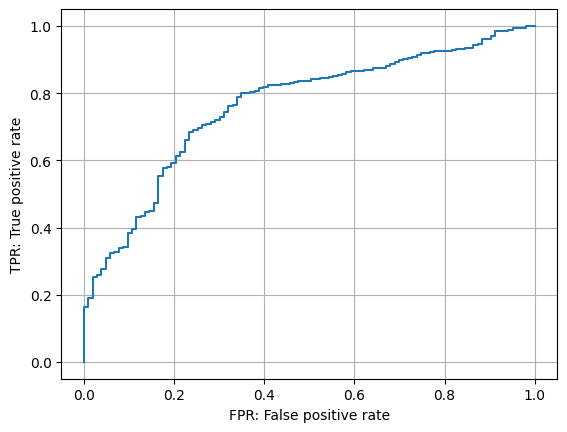

In [9]:
plt.plot(fpr, tpr, marker=',')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.savefig('ROC_curve_lr.pdf')

In [10]:
from sklearn.metrics import roc_auc_score
import numpy as np
print(roc_auc_score(df_answer_list,df_list))

0.7618288938677289


0.9466141540989148


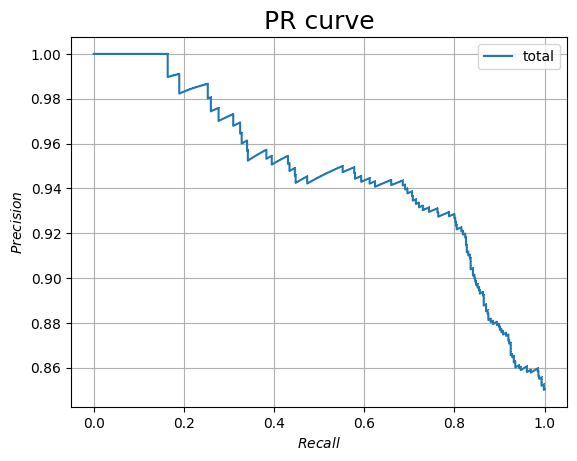

In [11]:
roc = precision_recall_curve(df_answer_list,df_list)
presicion, recall, thresholds = roc

plt.plot(recall, presicion, marker=',',label="total")
print(average_precision_score(df_answer_list,df_list,average="micro"))


plt.xlabel(r"$Recall$")
plt.ylabel(r"$Precision$")
plt.grid()

plt.legend()
plt.title("PR curve",fontsize=18)
plt.savefig('PR_curve_lr.pdf', bbox_inches="tight", pad_inches=0.05)